In [1]:
import os
os.getcwd()

'/content'

In [3]:
import json
import pandas as pd
from tqdm import tqdm
from bisection_algorithm import BisectionAnnotator

In [5]:
tqdm.pandas()

In [7]:
CLAIMS = {
    
    "1_1": "Joe Biden is sold out to China",
    "1_2": "Biden does business in China",
    "1_3": "China blackmails Biden",
    "1_4": "Biden works for China",
    "1_5": "The CCP controls Biden",
    "1_6": "Biden’s policies hurt the United States",
    
    #########

    "2_1": "Donald Trump is sold out to China",
    "2_2": "Trump does business in China",
    "2_3": "China blackmails Trump",
    "2_4": "Trump works for China",
    "2_5": "The CCP controls Trump",
    "2_6": "Trump’s policies hurt the United States",

}

In [8]:
ANNOTATOR = "ADD_ANNOTATOR"
PATH = "../data/threshold_tuning_annotations/" + ANNOTATOR

## Threshold tuning

In [9]:
# Loading data from CSV file and
df = pd.read_csv('../data/df_annot_2023-06-01.csv', low_memory=False, lineterminator='\n')
df['ZSL'] = df['ZSL'].progress_apply(eval)

In [10]:
cached_files = os.listdir(PATH)

100%|██████████| 1135285/1135285 [01:49<00:00, 10382.51it/s]


In [ ]:
def get_annotations_from_record():
    if text in texts


ANNOT NB: 54
MEDIAN: 0.950

INTERVAL: 0.870 - 0.990 	==> WIDTH: 0.120
TOTAL = 1.0000000000000002
LEFT MASS = 0.300 	RIGHT MASS = 0.700 	TOTAL = 1.000



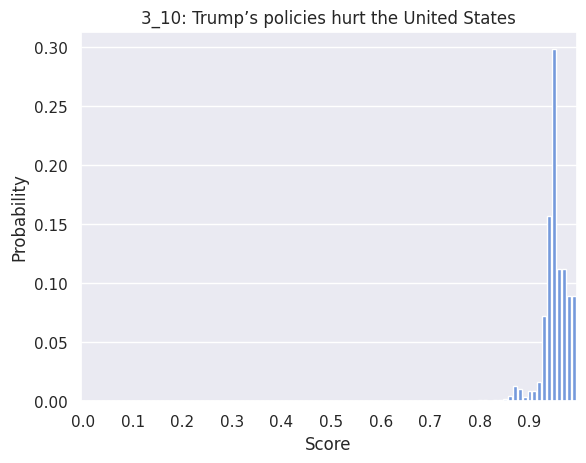

NEED TO STOP ANNOTATING! Data is too sparse


*********************************
***  THRESHOLD FOUND: 0.950   ***
*********************************



In [13]:
for claim_idx in CLAIMS:

    trait_class = claim_idx.split('_')[0]
    trait_text = CLAIMS[claim_idx]
    class_text = CLAIMS[trait_class + '_0']
      
    df_sub = df[~df['in_eval'].apply(lambda x: claim_idx in x)]
    df_sub = df_sub[~df_sub['in_training'].apply(lambda x: claim_idx in x)]
    annotator = BisectionAnnotator(df_sub, step=0.01, early_termination_width=0.05, level='sub-claim')

    if claim_idx + '_record.json'in cached_files:
        with open(os.path.join(PATH, claim_idx + '_record.json')) as file:
            record = json.load(file)
        df_sub[claim_idx + '_annot'] = df_sub.apply()
        if not record['continue']:
            continue
        print('You partially annotated trait ' + claim_idx + ' ("' + CLAIMS[claim_idx] + '"). Would you like to continue annotating this trait ("c" + ENTER) or move on to the next trait (ENTER)?' )
        answer = input()
        if answer != 'c':
            continue

    _, out_dict, early_stop = annotator(claim_idx, trait_text, trait_class, class_text, column='ZSL')

    with open(os.path.join(PATH, claim_idx + '_record.json'), 'w') as file:
        json.dump(out_dict, file)

    if early_stop:
        break